<a href="https://colab.research.google.com/github/Rvze/ML/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from sklearn.tree import export_graphviz
import graphviz
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [86]:
df = pd.read_csv("diabetes.csv", delimiter=",")

In [13]:
x = pd.read_csv("diabetes.csv", delimiter=",", nrows=520)

In [20]:
y = x.get("Outcome")

In [21]:
y

0      1
1      0
2      1
3      0
4      1
      ..
515    1
516    1
517    0
518    0
519    0
Name: Outcome, Length: 520, dtype: int64

In [25]:
cnt = 0
for i in y:
  if i == 0:
    cnt +=1
cnt

333

In [67]:
train_el = x.head(int(len(x)*0.8))
train_el

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
411,1,112,72,30,176,34.4,0.528,25,0
412,1,143,84,23,310,42.4,1.076,22,0
413,1,143,74,22,61,26.2,0.256,21,0
414,0,138,60,35,167,34.6,0.534,21,1


In [68]:
test_el = x.head(int(len(x)*0.2))
test_el

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
99,1,122,90,51,220,49.7,0.325,31,1
100,1,163,72,0,0,39.0,1.222,33,1
101,1,151,60,0,0,26.1,0.179,22,0
102,0,125,96,0,0,22.5,0.262,21,0


In [73]:
predictors = list(train_el.columns[:8])
X_train = train_el[predictors]
Y_train = train_el["Outcome"]

X_test = test_el[predictors]
Y_test = test_el["Outcome"]

In [49]:
clf = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=25, min_samples_leaf=15, random_state=2020)

In [74]:
clf = clf.fit(X_train, Y_train)

In [76]:
clf.tree_.max_depth


8

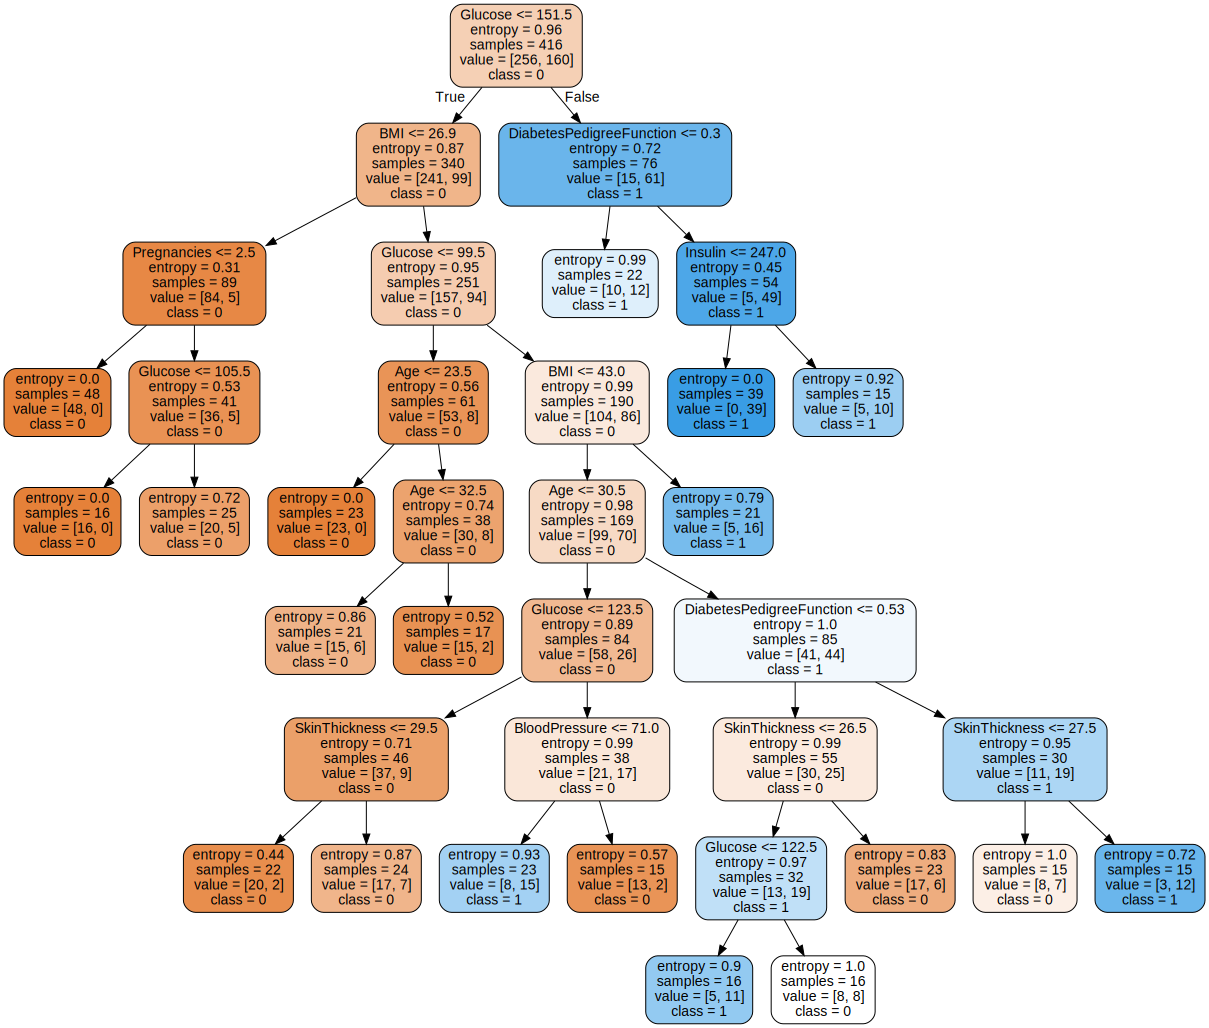

In [78]:
columns = list(X_train.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [92]:
predict = clf.predict(X_test)

In [94]:
accuracy_score(Y_test, predict)

0.8076923076923077

In [96]:
f1_score(Y_test, predict, average='macro')

0.7875816993464053

In [88]:
clf.predict(df.loc[[719, 739, 748, 734], predictors])

array([0, 1, 1, 0])